In [1]:
import os

os.listdir('../')

['.ipynb_checkpoints',
 'Anomaly Detection models',
 'baseline-model.ipynb',
 'DL models',
 'ML models']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve,average_precision_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE



In [4]:
data = pd.read_csv('../../data/creditcard.csv', low_memory=False)

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.corr().Class

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [8]:
# using the most important features already listed in the baseline model 

df = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
             'V11','V12','V13','V14','V16','V17','V21','V23','V27']]


In [9]:
# to know the frequency of different time recorded
data.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [10]:
data.loc[data['Class']==0, 'Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
154306.0     1
5380.0       1
105479.0     1
52741.0      1
90714.0      1
Name: Time, Length: 124479, dtype: int64

In [11]:
data.loc[data['Class']==1, 'Time'].value_counts()

68207.0     6
94362.0     4
85285.0     4
93860.0     4
84204.0     4
           ..
158638.0    1
125658.0    1
28692.0     1
15817.0     1
406.0       1
Name: Time, Length: 468, dtype: int64

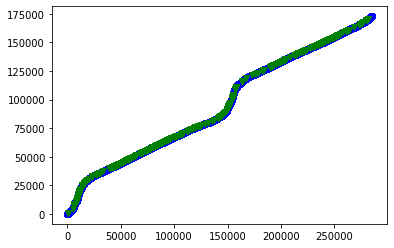

In [12]:
# plt.figure(figsize=(20,20))
plt.plot(data.loc[data['Class']==0, 'Time'], 'o',color= 'b')
plt.plot(data.loc[data['Class']==1, 'Time'], 'v', color= 'g' )

plt.show()


The above shows the spread of the fraud

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V16     284807 non-null  float64
 15  V17     284807 non-null  float64
 16  V21     284807 non-null  float64
 17  V23     284807 non-null  float64
 18  V27     284807 non-null  float64
dtypes: float64(19)
memory usage: 41.3 MB


In [14]:
# computing the class weight

val_count = data['Class'].value_counts()
weights = dict(1 / val_count)
weights

{0: 3.51722561243691e-06, 1: 0.0020325203252032522}

In [15]:
# adminstrative cost
admin_cost = 2.5

In [16]:
# defining a function to calculate cost savings
def cost_saving(ytrue, ypred, amount):
    fp = np.sum((ytrue == 0) & (ypred == 1))
    cost = np.sum(fp*admin_cost) + np.sum((amount[(ytrue == 1) & (ypred == 0)]))
    max_cost = np.sum((amount[(ytrue == 1)]))
    savings = 1 - (cost/max_cost)
    
    return savings

In [17]:
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state =1)


In [18]:
# defining a function to calculate cost saving per fold (splits) of our cv
def cost_saving_per_split(scores, x, y, cv_object):
    results = []
    for i, (_, test_ind) in zip(range(cv_object.n_splits), cv_object.split(x, y)):
        ypred = scores['estimator'][i].predict(x[test_ind])
        ytrue = y[test_ind]
        amount = data['Amount'].values[test_ind]
        results.append(cost_saving(ytrue, ypred, amount))
        
    return results

In [19]:
# defining a function to return a dataframe of metrics results for each fold in our cv
def get_metric_scores(scores, x, y, cv_object=cv):
    ind = ['split_'+str(n) for n in range(1, cv_object.n_splits+1)]
    
    scores_credit = pd.DataFrame(index=ind)
    
    scores_credit['f1_score'] = scores['test_f1']
    scores_credit['auc_pr'] = scores['test_average_precision']
    scores_credit['cost_savings'] = cost_saving_per_split(scores, x, y, cv_object)

    return scores_credit


### Fraud Sensitive Model

In [20]:
# using minmaxscaler

model = svm.LinearSVC()

minmax = MinMaxScaler()
MMscaled_ = minmax.fit_transform(df)
y= data.Class

In [21]:
fraud_sensitive_scores = cross_validate(model, MMscaled_, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

In [22]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores, MMscaled_,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.666667,0.699738,0.339043
split_2,0.719212,0.809325,0.424241
split_3,0.715686,0.789719,0.525291
split_4,0.702439,0.733629,0.409104


In [23]:
fraud_sensitive_results.mean()

f1_score        0.701001
auc_pr          0.758103
cost_savings    0.424420
dtype: float64

### Cost Sensitive Model

In [24]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [25]:
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, MMscaled_, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

In [26]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, MMscaled_, y)
cost_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.777328,0.690194,0.736774
split_2,0.816000,0.797151,0.756566
split_3,0.841202,0.771627,0.817012
split_4,0.806584,0.732424,0.735118


In [27]:
cost_sensitive_results.mean()

f1_score        0.810279
auc_pr          0.747849
cost_savings    0.761367
dtype: float64

In [28]:
%%time
smote = SMOTE()

for train_idx, test_idx, in cv.split(MMscaled_, y):
    X_train, y_train = MMscaled_[train_idx], y[train_idx]
    X_test, y_test = MMscaled_[test_idx], y[test_idx]
    X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)
    smote_gradient_model = svm.LinearSVC()
    smote_gradient_model.fit(X_train_oversampled, y_train_oversampled )  
    pred = smote_gradient_model.predict(X_test)
    print(f'roc_auc_score: {roc_auc_score(y_test, pred)}')
    print(f'f-score: {f1_score(y_test, pred)}')

roc_auc_score: 0.9248930852960241
f-score: 0.1288380493678507
roc_auc_score: 0.956330108820862
f-score: 0.12616566099835436
roc_auc_score: 0.9657685934475518
f-score: 0.1427699816961562
roc_auc_score: 0.9254557057093123
f-score: 0.1353573687539532
Wall time: 1min 16s


### Using pipelining with minmaxscaler plus LinearSVC, and prescaled data

In [29]:
# creating a pipeline 
clf = make_pipeline(MinMaxScaler(),
                   svm.LinearSVC(tol=1e-5))

In [30]:
%%time
f1_pipeline_scores =[]
auc_pipeline_scores = []

for train, test in cv.split(MMscaled_, y):
#     df.reset_index(inplace=True)
    Xtr, ytr = MMscaled_[train], y[train]
    xte, yte = MMscaled_[test], y[test]
    clf.fit(Xtr,ytr)
    y_pred = clf.predict(xte)
    f1_pipeline_scores.append(f1_score(yte,y_pred))
    auc_pipeline_scores.append(roc_auc_score(yte,y_pred))
    print(classification_report(yte,y_pred))
print('F1_scores', f1_pipeline_scores)
print('roc_auc_scores', auc_pipeline_scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.55      0.67       123

    accuracy                           1.00     71202
   macro avg       0.92      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.59      0.71       123

    accuracy                           1.00     71202
   macro avg       0.96      0.79      0.86     71202
weighted avg       1.00      1.00      1.00     71202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.59      0.72       123

    accuracy                           1.00     71202
   macro avg       0.95      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202

              preci

#Very good f1 scores 

In [31]:
df.iloc[284805]

V1    -0.240440
V2     0.530483
V3     0.702510
V4     0.689799
V5    -0.377961
V6     0.623708
V7    -0.686180
V8     0.679145
V9     0.392087
V10   -0.399126
V11   -1.933849
V12   -0.962886
V13   -1.042082
V14    0.449624
V16   -0.608577
V17    0.509928
V21    0.265245
V23   -0.163298
V27    0.108821
Name: 284805, dtype: float64

### Fraud Sensistive Model

In [32]:
# using standardScaler 

fraud_sensitive_model = svm.LinearSVC()

Scale = StandardScaler()
SSscaled = Scale.fit_transform(df)

In [33]:
fraud_sensitive_scores = cross_validate(fraud_sensitive_model, SSscaled, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

In [34]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores, SSscaled,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.782222,0.700728,0.713171
split_2,0.803571,0.804815,0.683659
split_3,0.808889,0.793337,0.659598
split_4,0.759259,0.724649,0.502450


In [35]:
fraud_sensitive_results.mean()

f1_score        0.788485
auc_pr          0.755882
cost_savings    0.639719
dtype: float64

### Cost Sensitive Model

In [36]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [37]:
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, SSscaled, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

In [38]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, SSscaled,y)
cost_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.781893,0.683264,0.725119
split_2,0.693069,0.766226,0.405626
split_3,0.836207,0.767949,0.794888
split_4,0.822511,0.723639,0.713143


In [39]:
cost_sensitive_results.mean()

f1_score        0.783420
auc_pr          0.735270
cost_savings    0.659694
dtype: float64

In [40]:
# testing with balanced data
smote = SMOTE()

for train_idx, test_idx, in cv.split(SSscaled, y):
    X_train, y_train = SSscaled[train_idx], y[train_idx]
    X_test, y_test = SSscaled[test_idx], y[test_idx]
    X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)
    smote_gradient_model = svm.LinearSVC()
    smote_gradient_model.fit(X_train_oversampled, y_train_oversampled )  
    pred = smote_gradient_model.predict(X_test)
    print(f'roc_auc_score: {roc_auc_score(y_test, pred)}')
    print(f'f-score: {f1_score(y_test, pred)}')

C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9248790164430577
f-score: 0.12868310282621767


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9558376989670374
f-score: 0.12150026413100898


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9574556170581755
f-score: 0.13830426939266388
roc_auc_score: 0.9287328795092167
f-score: 0.12750885478158208


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The smote gave a poor f1 score.